In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import time
from scipy.stats import linregress

import calendar

#from api_keys import api_key
from citipy import citipy

In [2]:
csvpath = "../gt-prj1-crime-data/crime_09_20_clean_dupsdeleted.csv"
csvfile = pd.read_csv(csvpath,encoding="utf-8")
crime_df = pd.DataFrame(csvfile)
crime_df.head()

C:\Users\kliu3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12


In [3]:
crime_years_df=crime_df.groupby(["occur_year"])
crime_byyear=crime_years_df['UC2_Literal'].count()
crime_byyear

occur_year
2009    39297
2010    35501
2011    34833
2012    33370
2013    32389
2014    31104
2015    30046
2016    28986
2017    26373
2018    25606
2019    24842
2020    21901
Name: UC2_Literal, dtype: int64

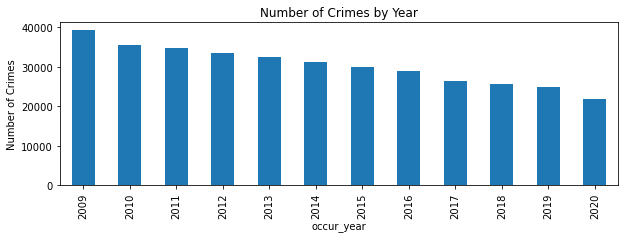

<Figure size 432x288 with 0 Axes>

In [4]:
crime_byyear_chart = crime_byyear.plot(kind='bar',figsize=(10,3), title=("Number of Crimes by Year"))

# Set the xlabel and ylabel using class methods
crime_byyear_chart.set_xlabel("occur_year")
crime_byyear_chart.set_ylabel("Number of Crimes")


plt.show()
plt.tight_layout()

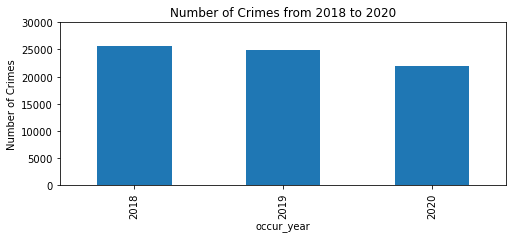

<Figure size 432x288 with 0 Axes>

In [5]:
crime_Y18_Y20_chart = crime_byyear.iloc[9:12].plot(kind='bar',figsize=(8,3), title=("Number of Crimes from 2018 to 2020"))

# Set the xlabel and ylabel using class methods
crime_Y18_Y20_chart.set_xlabel("occur_year")
crime_Y18_Y20_chart.set_ylabel("Number of Crimes")

plt.ylim(0, 30000)

plt.show()
plt.tight_layout()

In [6]:
crime_yearmonth_df=crime_df.groupby(["occur_year","occur_month"])
crime_byyearmonth=crime_yearmonth_df['UC2_Literal'].count()
crime_byyearmonth

occur_year  occur_month
2009        1              3431
            2              2635
            3              3026
            4              3062
            5              3426
                           ... 
2020        8              1802
            9              1622
            10             2314
            11             2430
            12             2467
Name: UC2_Literal, Length: 144, dtype: int64

In [7]:
three_year_month_crime = crime_byyearmonth.loc[2018:2020, :]
three_year_month_crime = three_year_month_crime.reset_index()
three_yearmonth_crime=three_year_month_crime.rename(columns={"UC2_Literal":"crimes"})
three_yearmonth_crime['occur_month'] = three_yearmonth_crime['occur_month'].apply(lambda x: calendar.month_abbr[x])
three_yearmonth_crime.head()

,occur_year,occur_month,crimes
0,2018,Jan,2008
1,2018,Feb,1938
2,2018,Mar,1865
3,2018,Apr,1971
4,2018,May,2263


36


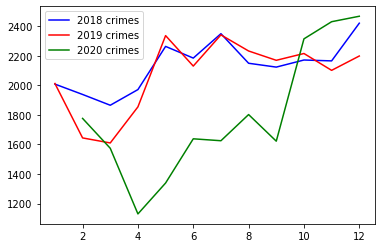

In [8]:

months=three_year_month_crime["occur_month"]
print(len(months))
crimes_2018, = plt.plot(months[0:12],three_yearmonth_crime['crimes'].iloc[0:12], color="blue", label="2018 crimes")
crimes_2019, = plt.plot(months[12:24], three_yearmonth_crime['crimes'].iloc[12:24], color="red", label="2019 crimes")
crimes_2020, = plt.plot(months[25:36], three_yearmonth_crime['crimes'].iloc[25:36], color="green", label="2020 crimes")
plt.legend(handles=[crimes_2018, crimes_2019,crimes_2020], loc="best")


plt.show()

In [13]:
##  Put the months into bins and made "Seasons"
bins = [0,3,6,9,12]
seasons = ["Winter","Spring","Summer","Autumn"]

crime_df["Seasons"] = pd.cut(crime_df["occur_month"],bins,labels=seasons,include_lowest=False)

crime_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Seasons
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12,Autumn
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12,Autumn
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12,Autumn
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12,Autumn
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1,Winter
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1,Winter
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1,Winter
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1,Winter


In [15]:
season=crime_df[crime_df['Seasons']=='Autumn']
season.head()

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Seasons
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12,Autumn
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12,Autumn
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12,Autumn
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12,Autumn
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12,Autumn


In [16]:
crime_df_data = crime_df.groupby(['occur_year','Seasons'])
crime_count_df = crime_df_data['offense_id'].count()
crime_count_df.head()

occur_year  Seasons
2009        Winter      9092
            Spring     10170
            Summer     10138
            Autumn      9897
2010        Winter      7370
Name: offense_id, dtype: int64

In [17]:
three_year_crime_data = crime_count_df.loc[2018:2020, :]
three_year_crime_data = three_year_crime_data.reset_index()
three_year_crime_data

,occur_year,Seasons,offense_id
0,2018,Winter,5811
1,2018,Spring,6418
2,2018,Summer,6621
3,2018,Autumn,6756
4,2019,Winter,5266
5,2019,Spring,6320
6,2019,Summer,6742
7,2019,Autumn,6514
8,2020,Winter,5534
9,2020,Spring,4107


<AxesSubplot:xlabel='occur_year', ylabel='offense_id'>

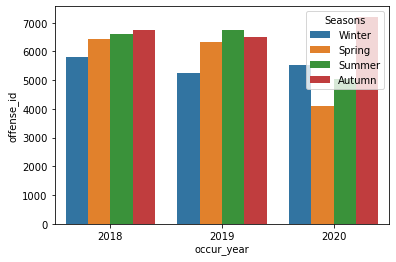

In [18]:
sns.barplot(x = 'occur_year', y = 'offense_id', hue = 'Seasons', data = three_year_crime_data)

In [19]:
season=crime_df[crime_df['Seasons']=='Autumn']
season.head()

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Seasons
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12,Autumn
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12,Autumn
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12,Autumn
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12,Autumn
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12,Autumn


In [20]:
crime_season_data =season.groupby(['occur_year'])

crime_season_count=crime_season_data['UC2_Literal'].value_counts().to_frame()
crime_season_count
rename_crime_season_count=crime_season_count.rename(columns={"UC2_Literal":"Total Count"})
rename_crime_season_count

Total Count
occur_year UC2_Literal                      
2009       LARCENY-FROM VEHICLE         2877
           LARCENY-NON VEHICLE          2082
           BURGLARY-RESIDENCE           1948
           AUTO THEFT                   1251
           AGG ASSAULT                   571
...                                      ...
2020       AUTO THEFT                   1144
           AGG ASSAULT                   702
           BURGLARY                      483
           ROBBERY                       284
           HOMICIDE                       45

[117 rows x 1 columns]

In [21]:
threeyear_crime_season_count=rename_crime_season_count.loc[2018:2020,:]
threeyear_crime_season_count=threeyear_crime_season_count.reset_index()
threeyear_crime_season_R=threeyear_crime_season_count.rename(columns={"occur_year":"years","Total Count":"Total Crime Count"})
threeyear_crime_season_R

,years,UC2_Literal,Total Crime Count
0,2018,LARCENY-FROM VEHICLE,2839
1,2018,LARCENY-NON VEHICLE,1561
2,2018,AUTO THEFT,884
3,2018,BURGLARY-RESIDENCE,579
4,2018,AGG ASSAULT,423
5,2018,ROBBERY-PEDESTRIAN,188
6,2018,BURGLARY-NONRES,175
7,2018,ROBBERY-COMMERCIAL,54
8,2018,ROBBERY-RESIDENCE,32
9,2018,HOMICIDE,21


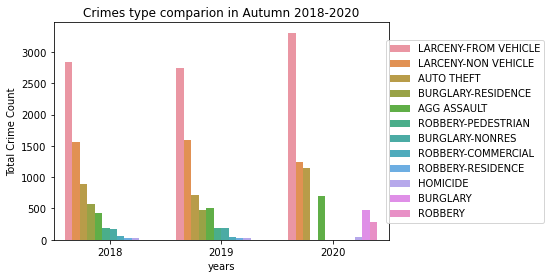

In [33]:
fig=sns.barplot(x = 'years', y = 'Total Crime Count', hue = 'UC2_Literal', data = threeyear_crime_season_R)

fig.legend(loc='right', bbox_to_anchor=(1.48, 0.5), ncol=1)

plt.title("Crimes type comparion in Autumn 2018-2020")

plt.savefig("crimesautumnfig.png")
plt.show(fig)